In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import spearmanr


In [258]:
CIRM_rec_path = "/scratch/tmpaquaij/Results/atommic/mltrs/trained_models/SKMTEA/CIRIM_sense/predictions_8x/2024-01-10_23-33-53/predictions/results_reconstruction.csv"
MTLRS_rec_path ="/scratch/tmpaquaij/Results/atommic/mltrs/trained_models/SKMTEA/MTLRS_SENSE/predictions_8x/2024-01-11_03-07-24/predictions/results_reconstruction_stacked_.csv"
MTLRS_seg_path = "/scratch/tmpaquaij/Results/atommic/mltrs/trained_models/SKMTEA/MTLRS_SENSE/predictions_8x/2024-01-11_03-07-24/predictions/results_segmentation.csv"

In [259]:
MTLRS_rec = pd.read_csv(MTLRS_rec_path,index_col=0)
CIRIM_rec = pd.read_csv(CIRM_rec_path,index_col=0)
MTLRS_seg = pd.read_csv(MTLRS_seg_path,index_col=0)

MTLRS = MTLRS_rec.merge(MTLRS_seg)

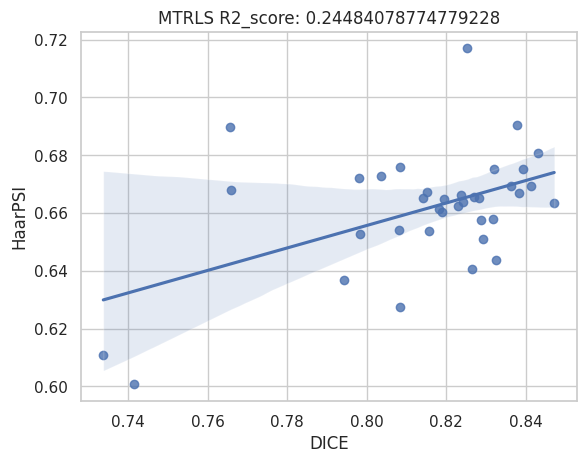

In [260]:
output = 'stacked'
sns.set_theme(style="whitegrid")
ax = sns.regplot(data=MTLRS,x='DICE',y='HaarPSI')
slope, intercept = np.polyfit(MTLRS.DICE,MTLRS.HaarPSI,1)
y_pred = intercept+ MTLRS.DICE*slope
score = r2_score(MTLRS.HaarPSI,y_pred)
plt.title(f"MTRLS R2_score: {score}")
plt.savefig('/scratch/tmpaquaij/Figures/Regression_plot_HaarPSI_gaussian2d_8x.png')

In [261]:
score = spearmanr(MTLRS.DICE,MTLRS.HaarPSI)
print(score)

SignificanceResult(statistic=0.2924066924066924, pvalue=0.08352789517705797)


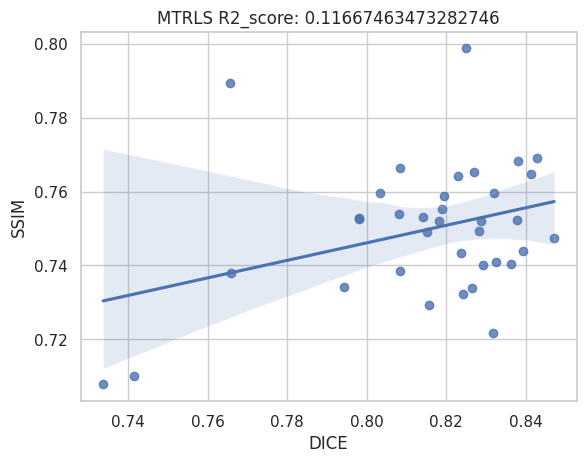

In [262]:
output = 'stacked'
sns.set_theme(style="whitegrid")
ax = sns.regplot(data=MTLRS,x='DICE',y='SSIM')
slope, intercept = np.polyfit(MTLRS.DICE,MTLRS.SSIM,1)
y_pred = intercept+ MTLRS.DICE*slope
score = r2_score(MTLRS.SSIM,y_pred)
plt.title(f"MTRLS R2_score: {score}")
plt.savefig('/scratch/tmpaquaij/Figures/Regression_plot_SSIM_gaussian2d_8x.png')

In [263]:
score = spearmanr(MTLRS.DICE,MTLRS.SSIM)
print(score)

SignificanceResult(statistic=0.17631917631917632, pvalue=0.30363642180538414)


In [264]:

CIRIM_rec.rename(columns={'MSE':'MSE_CIRIM','NMSE':'NMSE_CIRIM','PSNR':'PSNR_CIRIM','HaarPSI':'HaarPSI_CIRIM','VSI':'VSI_CIRIM','SSIM':'SSIM_CIRIM'},inplace=True)
MTLRS_rec.rename(columns={'MSE':'MSE_MTLRS','NMSE':'NMSE_MTLRS','PSNR':'PSNR_MTLRS','HaarPSI':'HaarPSI_MTLRS','VSI':'VSI_MTLRS','SSIM':'SSIM_MTLRS'},inplace=True)
rec_merg = CIRIM_rec.merge(MTLRS_rec)
selected_col = ['patiend_id', 'SSIM_MTLRS','SSIM_CIRIM','HaarPSI_MTLRS','HaarPSI_CIRIM']
data_poisson = rec_merg.loc[:,selected_col].head(11)
data_poisson.to_csv('/scratch/tmpaquaij/Figures/Gaussain_8x.csv')
print(data_poisson)


   patiend_id  SSIM_MTLRS  SSIM_CIRIM  HaarPSI_MTLRS  HaarPSI_CIRIM
0     MTR_005    0.759550    0.765962       0.675141       0.682415
1     MTR_006    0.752833    0.759862       0.672083       0.676574
2     MTR_030    0.749133    0.755032       0.667266       0.671551
3     MTR_034    0.764865    0.769786       0.669358       0.673072
4     MTR_048    0.721691    0.727620       0.658019       0.667417
5     MTR_052    0.707784    0.716328       0.610796       0.619302
6     MTR_065    0.733818    0.745101       0.640619       0.647613
7     MTR_066    0.798736    0.800865       0.716950       0.723200
8     MTR_079    0.752492    0.763126       0.652820       0.659148
9     MTR_080    0.769182    0.778472       0.680654       0.692522
10    MTR_096    0.752402    0.758044       0.690314       0.700319


In [265]:
CIRM_rec_path = "/scratch/tmpaquaij/Results/atommic/mltrs/trained_models/SKMTEA/CIRIM_sense/predictions_4x/2024-01-15_21-52-00/predictions/results_reconstruction_stacked_.csv"
MTLRS_rec_path ="/scratch/tmpaquaij/Results/atommic/mltrs/trained_models/SKMTEA/MTLRS_SENSE/predictions_4x/2024-01-15_17-43-55/predictions/results_reconstruction_stacked_.csv"
MTLRS_seg_path = "/scratch/tmpaquaij/Results/atommic/mltrs/trained_models/SKMTEA/MTLRS_SENSE/predictions_4x/2024-01-15_17-43-55/predictions/results_segmentation.csv"

In [266]:
MTLRS_rec = pd.read_csv(MTLRS_rec_path,index_col=0)
CIRIM_rec = pd.read_csv(CIRM_rec_path,index_col=0)
MTLRS_seg = pd.read_csv(MTLRS_seg_path,index_col=0)

MTLRS = MTLRS_rec.merge(MTLRS_seg)

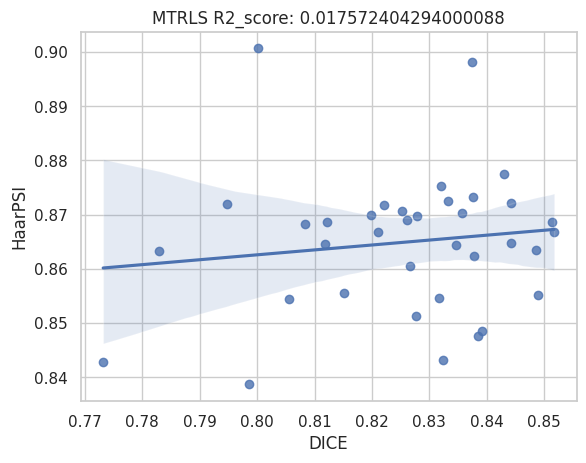

In [267]:
output = 'stacked'
sns.set_theme(style="whitegrid")
ax = sns.regplot(data=MTLRS,x='DICE',y='HaarPSI')
slope, intercept = np.polyfit(MTLRS.DICE,MTLRS.HaarPSI,1)
y_pred = intercept+ MTLRS.DICE*slope
score = r2_score(MTLRS.HaarPSI,y_pred)
plt.title(f"MTRLS R2_score: {score}")
plt.savefig('/scratch/tmpaquaij/Figures/Regression_plot_HaarPSI_poisson2d_4x.png')

In [268]:
score = spearmanr(MTLRS.DICE,MTLRS.HaarPSI)
print(score)

SignificanceResult(statistic=0.09832689832689835, pvalue=0.5683209387694999)


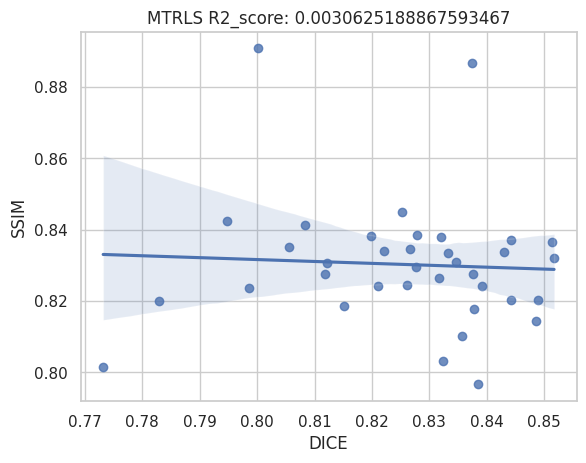

In [269]:
output = 'stacked'
sns.set_theme(style="whitegrid")
ax = sns.regplot(data=MTLRS,x='DICE',y='SSIM')
slope, intercept = np.polyfit(MTLRS.DICE,MTLRS.SSIM,1)
y_pred = intercept+ MTLRS.DICE*slope
score = r2_score(MTLRS.SSIM,y_pred)
plt.title(f"MTRLS R2_score: {score}")
plt.savefig('/scratch/tmpaquaij/Figures/Regression_plot_SSIM_poisson2d_4x.png')

In [270]:
score = spearmanr(MTLRS.DICE,MTLRS.SSIM)
print(score)

SignificanceResult(statistic=-0.14723294723294725, pvalue=0.39149742242481256)


In [271]:
CIRIM_rec.rename(columns={'MSE':'MSE_CIRIM','NMSE':'NMSE_CIRIM','PSNR':'PSNR_CIRIM','HaarPSI':'HaarPSI_CIRIM','VSI':'VSI_CIRIM','SSIM':'SSIM_CIRIM'},inplace=True)
MTLRS_rec.rename(columns={'MSE':'MSE_MTLRS','NMSE':'NMSE_MTLRS','PSNR':'PSNR_MTLRS','HaarPSI':'HaarPSI_MTLRS','VSI':'VSI_MTLRS','SSIM':'SSIM_MTLRS'},inplace=True)
rec_merg = CIRIM_rec.merge(MTLRS_rec)
selected_col = ['patiend_id', 'SSIM_MTLRS','SSIM_CIRIM','HaarPSI_MTLRS','HaarPSI_CIRIM']
data_poisson = rec_merg.loc[:,selected_col].head(11)
print(data_poisson)
data_poisson.to_csv('/scratch/tmpaquaij/Figures/Poisson2d_4x.csv')

   patiend_id  SSIM_MTLRS  SSIM_CIRIM  HaarPSI_MTLRS  HaarPSI_CIRIM
0     MTR_005    0.833986    0.836825       0.871828       0.881485
1     MTR_006    0.834404    0.835672       0.860449       0.868280
2     MTR_030    0.831998    0.835030       0.866888       0.877091
3     MTR_034    0.833615    0.834869       0.877432       0.885424
4     MTR_048    0.803078    0.805849       0.843114       0.853670
5     MTR_052    0.823573    0.826934       0.838679       0.847151
6     MTR_065    0.824138    0.826780       0.848463       0.858282
7     MTR_066    0.886628    0.889881       0.898068       0.907193
8     MTR_079    0.826353    0.829664       0.854559       0.863792
9     MTR_080    0.827563    0.829854       0.873283       0.885261
10    MTR_096    0.810002    0.809889       0.870348       0.877675
